In [1]:
# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
ht_wt = pd.read_csv('weight-height.csv')
ht_wt.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
ht_wt.shape

(10000, 3)

In [6]:
ht_wt.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [7]:
ht_wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [8]:
ht_wt.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [9]:
ht_wt.Gender.value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [15]:
(ht_wt['Gender']=='Male').sum()

5000

## Visualization

Understanding the code:

kind: Shows what kind of plot we want to visualize. e,g, hist, box and other kind.
title: The title of the plot.
color: you can choose any color. In my case 'c' stands for cyan

/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

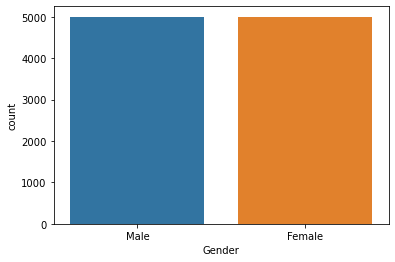

In [16]:
sns.countplot(ht_wt['Gender'])

<AxesSubplot:xlabel='Gender', ylabel='Weight'>

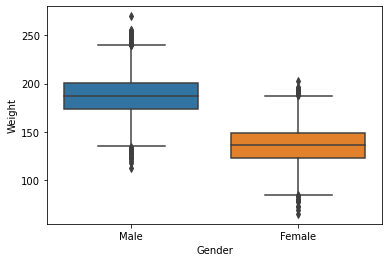

In [17]:
sns.boxplot(x = 'Gender', y = 'Weight' , data = ht_wt)

<AxesSubplot:xlabel='Height', ylabel='Weight'>

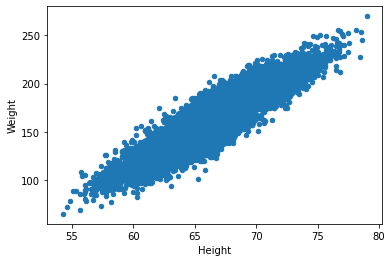

In [18]:
# Scatter Plot with Weight as a function of Height
ht_wt.plot(kind='scatter',x='Height',y='Weight')


We can see that there is almost a Linear relation between Height and Weight.As Height increases, weight increases.This is quite obvious as bone weight would be more in taller people.

In [19]:
# Male and Female Separation on Scatter Plot

males   = ht_wt[ht_wt['Gender']=='Male']
females = ht_wt[ht_wt['Gender']=='Female']

<AxesSubplot:title={'center':'Male and Female Populations'}, xlabel='Height', ylabel='Weight'>

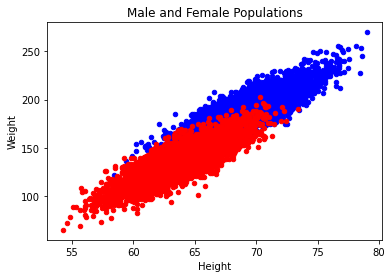

In [21]:
fig,ax = plt.subplots()
males.plot(kind='scatter',x='Height',y='Weight', ax = ax,color = 'blue',title='Male and Female Populations')
females.plot(kind='scatter',x='Height',y='Weight',ax = ax,color='red',title='Male and Female Populations')

So we can see that there is a clear seperation between Male and Female.Women generally have lower height than Men so their weighs alos proportionally lower.

In [23]:
# Using map method

<AxesSubplot:title={'center':'Male & Female Population'}, xlabel='Height', ylabel='Weight'>

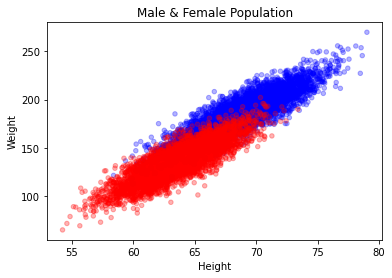

In [22]:
ht_wt['Genddercolor'] = ht_wt['Gender'].map({'Male':'blue','Female':'red'})
ht_wt.plot(kind='scatter',x='Height',y='Weight',c = ht_wt['Genddercolor'],
        alpha=0.3,title='Male & Female Population')

Text(0.5, 1.0, 'Male & Female Populations')

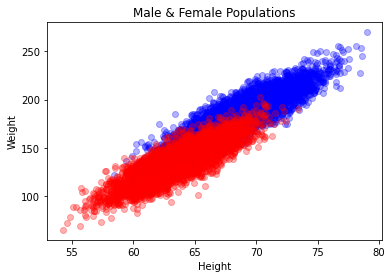

In [24]:
# Here we will use a simple matplotlib techinique to plot the same graph.

fig,ax = plt.subplots()
ax.plot(males['Height'],males['Weight'],'ob',females['Height'],females['Weight'],'or',alpha=0.3)
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Male & Female Populations')

## Distribution Using Histograms


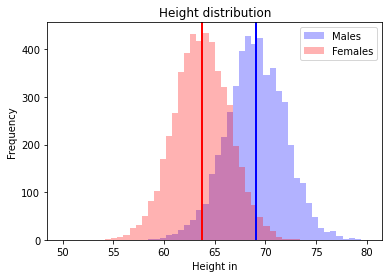

In [25]:
# Height Distribution

males['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='blue')
females['Height'].plot(kind='hist',bins=50,range=(50,80),alpha=0.3,color='red')
plt.title('Height distribution')
plt.legend(['Males','Females'])
plt.xlabel('Height in')
plt.axvline(males['Height'].mean(),color='blue',linewidth=2)
plt.axvline(females['Height'].mean(),color='red',linewidth=2)

The Male gender are taller than Female.The red and blue lines show the mean of Female and Male height.



In [26]:
pvt = ht_wt.pivot(columns='Gender',values='Weight')
pvt.head()

Gender,Female,Male
0,NaN,241.893563
1,NaN,162.310473
2,NaN,212.740856
3,NaN,220.042470
4,NaN,206.349801


Text(0, 0.5, 'Weight (lb)')

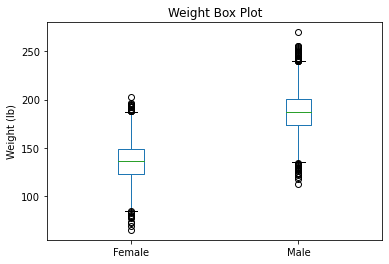

In [27]:
pvt.plot(kind='box');
plt.title('Weight Box Plot')
plt.ylabel('Weight (lb)')

## KDE Distribution

<AxesSubplot:title={'center':'Univariate: Height KDE'}, ylabel='Density'>

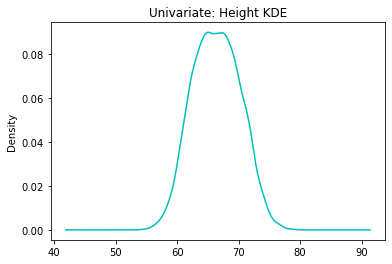

In [28]:
# KDE distribution for Height

ht_wt.Height.plot(kind ="kde", title = 'Univariate: Height KDE', color ='c')

<AxesSubplot:title={'center':'Univariate: Weight KDE'}, ylabel='Density'>

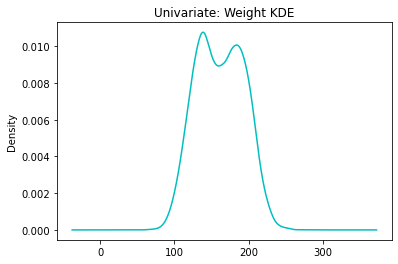

In [30]:
# KDE distribution for Weight

ht_wt.Weight.plot(kind ="kde", title ='Univariate: Weight KDE', color='c')

In [41]:
X = ht_wt['Height'].values[:,None]
Y = ht_wt.iloc[:,2]

In [42]:
# Splitting the train test data

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.20 , random_state= 42)

In [43]:
lr = LinearRegression()

In [44]:
lr.fit(X_train,Y_train)

LinearRegression()

In [50]:
Y_test = lr.predict(X_test)

In [51]:
Y_test

array([179.25399046, 180.34848321, 161.62288801, ..., 129.20288223,
       166.78470522, 101.81227499])

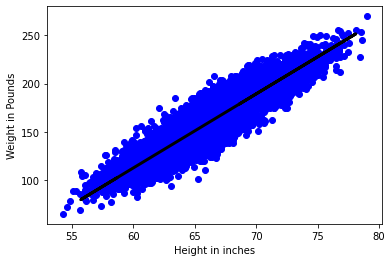

In [53]:
plt.scatter(X,Y,color='b')
plt.plot(X_test,Y_test,color = 'black',linewidth=3)
plt.xlabel('Height in inches')
plt.ylabel('Weight in Pounds')
plt.show()

The blue dots are the actual weight and the black line indicates the linear model prediction.

In [55]:
y_train_pred = lr.predict(X_train)
y_test_pred  = lr.predict(X_test)

In [59]:
from sklearn.metrics import mean_squared_error as mse,r2_score

In [61]:
print("The Mean Squared Error on Train set is:\t{:0.1f}".format(mse(Y_train,y_train_pred)))
print("The Mean Squared Error on Test set is:\t{:0.1f}".format(mse(Y_test,y_test_pred)))

The Mean Squared Error on Train set is:	149.4
The Mean Squared Error on Test set is:	0.0


The mean squared error value for a good model should have low value.

In [63]:
print("The R2 score on the Train set is:\t{:0.1f}".format(r2_score(Y_train,y_train_pred)))
print("The R2 score on the Test set is:\t{:0.1f}".format(r2_score(Y_test,y_test_pred)))

The R2 score on the Train set is:	0.9
The R2 score on the Test set is:	1.0


The R2 Square error for a good model should be close to 1.